In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [6]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import math
from shapely.geometry import Point
from pyproj import CRS

In [7]:
drive.mount('/content/drive')
excel_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tese/CapitaisDistrito_Valores_dia_Tn_Tx_Prec_RG.xlsx', sheet_name=4)
excel_df

Mounted at /content/drive


,ANO,MÊS,DIA,Viana do Castelo,Braga,Vila Real,Bragança,Porto,Aveiro,Viseu,...,Coimbra,Castelo Branco,Leiria,Santarém,Portalegre,Lisboa,Setúbal,Évora,Beja,Faro
0,2010,1,1,-990.0,7709.7,3627.6,3996.4,-990.0,6323.3,5394.4,...,7107.6,6966.4,-990.0,3705.0,4679.6,7037.9,9379.1,7952.1,9998.2,10747.1
1,2010,1,2,-990.0,3162.4,2011.2,1555.1,3655.6,2984.7,2752.7,...,4225.7,2920.6,4267.9,4184.7,4556.7,3895.4,3231.8,4715.6,5336.5,1899.4
2,2010,1,3,-990.0,5527.5,3619.6,1927.2,-990.0,3638.0,2289.0,...,3746.5,730.9,-990.0,2296.0,562.4,2881.0,2040.7,1267.2,1675.3,1849.5
3,2010,1,4,-990.0,1630.2,1594.4,723.8,-990.0,2813.1,1901.9,...,2383.1,2796.3,-990.0,2836.2,2704.4,3524.9,3687.0,3047.9,-990.0,5787.7
4,2010,1,5,-990.0,-990.0,3210.0,3709.7,7354.1,6120.9,4260.5,...,3170.6,6261.7,-990.0,3198.4,3489.9,4660.4,-990.0,4252.0,6242.7,7838.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2024,12,27,7883.5,8005.5,1935.5,3075.4,7951.5,8322.7,69.5,...,8870.3,9160.0,9474.1,10509.7,4201.9,9411.2,10370.6,9493.9,10045.1,9276.1
5475,2024,12,28,7213.6,7805.9,1520.8,2301.3,7777.2,8223.2,76.6,...,8784.7,9374.7,9326.8,10656.8,4733.7,9468.1,10274.6,9643.0,10422.1,10797.4
5476,2024,12,29,8104.8,8428.4,1030.5,1365.2,8046.0,8333.0,81.1,...,9040.6,9431.7,9475.0,10515.7,4954.1,9777.5,10841.1,9965.4,10627.3,10982.0
5477,2024,12,30,7937.9,8166.7,1352.6,1625.2,8062.0,8619.6,78.0,...,8887.7,8054.0,9593.3,10702.5,4904.1,9740.9,10804.0,9937.9,10525.9,10630.2


In [8]:
excel_df['Date'] = pd.to_datetime(excel_df['ANO'].astype(str) + '-' + excel_df['MÊS'].astype(str) + '-' + excel_df['DIA'].astype(str))
excel_df.head()

,ANO,MÊS,DIA,Viana do Castelo,Braga,Vila Real,Bragança,Porto,Aveiro,Viseu,...,Castelo Branco,Leiria,Santarém,Portalegre,Lisboa,Setúbal,Évora,Beja,Faro,Date
0,2010,1,1,-990.0,7709.7,3627.6,3996.4,-990.0,6323.3,5394.4,...,6966.4,-990.0,3705.0,4679.6,7037.9,9379.1,7952.1,9998.2,10747.1,2010-01-01
1,2010,1,2,-990.0,3162.4,2011.2,1555.1,3655.6,2984.7,2752.7,...,2920.6,4267.9,4184.7,4556.7,3895.4,3231.8,4715.6,5336.5,1899.4,2010-01-02
2,2010,1,3,-990.0,5527.5,3619.6,1927.2,-990.0,3638.0,2289.0,...,730.9,-990.0,2296.0,562.4,2881.0,2040.7,1267.2,1675.3,1849.5,2010-01-03
3,2010,1,4,-990.0,1630.2,1594.4,723.8,-990.0,2813.1,1901.9,...,2796.3,-990.0,2836.2,2704.4,3524.9,3687.0,3047.9,-990.0,5787.7,2010-01-04
4,2010,1,5,-990.0,-990.0,3210.0,3709.7,7354.1,6120.9,4260.5,...,6261.7,-990.0,3198.4,3489.9,4660.4,-990.0,4252.0,6242.7,7838.8,2010-01-05


In [9]:
cols_to_clean = excel_df.columns.difference(['ANO', 'MÊS', 'DIA', 'Date'])
excel_df[cols_to_clean] = excel_df[cols_to_clean].replace(-990.0, float('nan'))
excel_df.head()

,ANO,MÊS,DIA,Viana do Castelo,Braga,Vila Real,Bragança,Porto,Aveiro,Viseu,...,Castelo Branco,Leiria,Santarém,Portalegre,Lisboa,Setúbal,Évora,Beja,Faro,Date
0,2010,1,1,NaN,7709.7,3627.6,3996.4,NaN,6323.3,5394.4,...,6966.4,NaN,3705.0,4679.6,7037.9,9379.1,7952.1,9998.2,10747.1,2010-01-01
1,2010,1,2,NaN,3162.4,2011.2,1555.1,3655.6,2984.7,2752.7,...,2920.6,4267.9,4184.7,4556.7,3895.4,3231.8,4715.6,5336.5,1899.4,2010-01-02
2,2010,1,3,NaN,5527.5,3619.6,1927.2,NaN,3638.0,2289.0,...,730.9,NaN,2296.0,562.4,2881.0,2040.7,1267.2,1675.3,1849.5,2010-01-03
3,2010,1,4,NaN,1630.2,1594.4,723.8,NaN,2813.1,1901.9,...,2796.3,NaN,2836.2,2704.4,3524.9,3687.0,3047.9,NaN,5787.7,2010-01-04
4,2010,1,5,NaN,NaN,3210.0,3709.7,7354.1,6120.9,4260.5,...,6261.7,NaN,3198.4,3489.9,4660.4,NaN,4252.0,6242.7,7838.8,2010-01-05


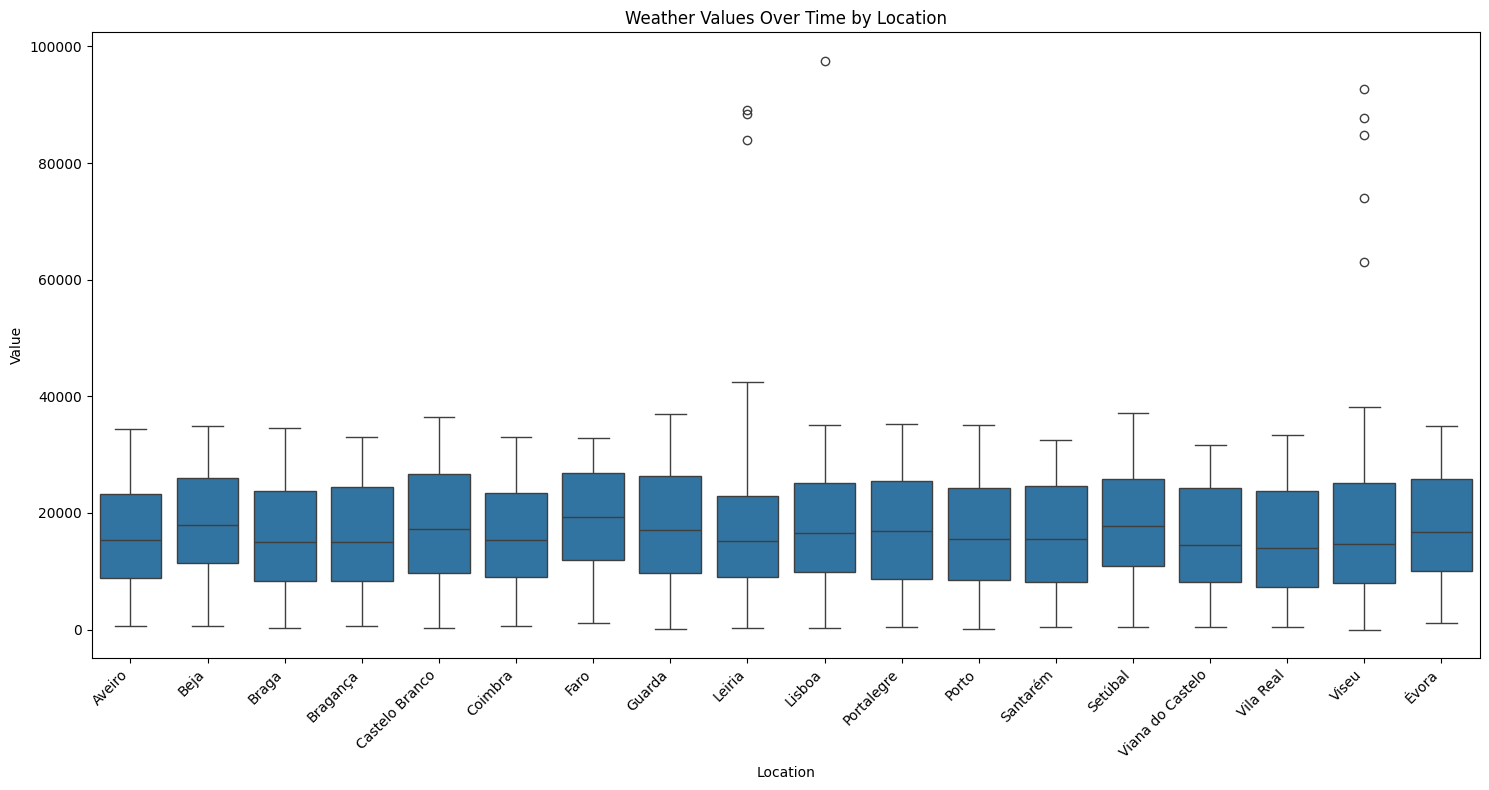

In [10]:
melted_df = excel_df.melt(id_vars=['Date'], value_vars=excel_df.columns.difference(['ANO', 'MÊS', 'DIA', 'Date']), var_name='variable', value_name='value')

plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df, x='variable', y='value')
plt.title('Weather Values Over Time by Location')
plt.xlabel('Location')
plt.ylabel('Value ')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Identify outliers using IQR

**Reasoning**:
Calculate the Interquartile Range (IQR) for each city to identify outliers.

In [11]:
outlier_THRESHOLD = 1.5

def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - outlier_THRESHOLD * IQR
    upper_bound = Q3 + outlier_THRESHOLD * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers for each city
outliers_dict = {}
for city in melted_df['variable'].unique():
    city_df = melted_df[melted_df['variable'] == city].copy()
    city_outliers = find_outliers_iqr(city_df, 'value')
    if not city_outliers.empty:
        outliers_dict[city] = city_outliers

# Display the identified outliers
for city, outliers in outliers_dict.items():
    print(f"Outliers for {city}:")
    display(outliers)

Outliers for Leiria:


,Date,variable,value
45321,2014-01-29,Leiria,89051.6
45322,2014-01-30,Leiria,83975.5
45326,2014-02-03,Leiria,88435.2


Outliers for Lisboa:


,Date,variable,value
50801,2014-01-30,Lisboa,97534.7


Outliers for Viseu:


,Date,variable,value
89153,2014-01-29,Viseu,87701.2
89154,2014-01-30,Viseu,63077.8
89156,2014-02-01,Viseu,92771.1
89157,2014-02-02,Viseu,84823.9
89158,2014-02-03,Viseu,74000.3


## Compare Beja with other cities

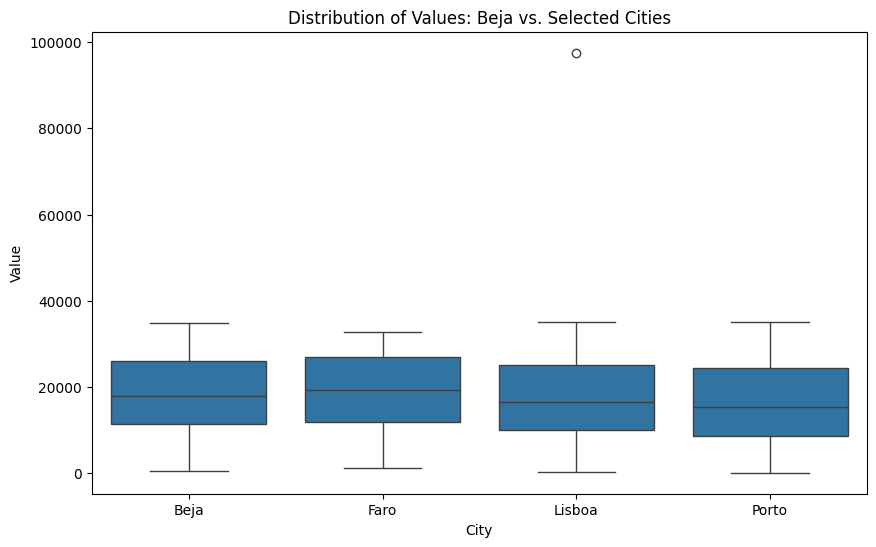

In [12]:
# Select a few other cities to compare with Beja
cities_to_compare = ['Beja', 'Lisboa', 'Porto', 'Faro']

# Filter the melted DataFrame to include only the selected cities
compare_df = melted_df[melted_df['variable'].isin(cities_to_compare)]

# Create a box plot for the selected cities
plt.figure(figsize=(10, 6))
sns.boxplot(data=compare_df, x='variable', y='value')
plt.title('Distribution of Values: Beja vs. Selected Cities')
plt.xlabel('City')
plt.ylabel('Value')
plt.show()

In [13]:
# Create a new DataFrame without the outliers
melted_df_cleaned = melted_df.copy()
for city, outliers in outliers_dict.items():
    melted_df_cleaned = melted_df_cleaned.drop(outliers.index)

# Display the shape of the cleaned DataFrame
print("Shape of the original DataFrame:", melted_df.shape)
print("Shape of the cleaned DataFrame:", melted_df_cleaned.shape)

Shape of the original DataFrame: (98622, 3)
Shape of the cleaned DataFrame: (98613, 3)


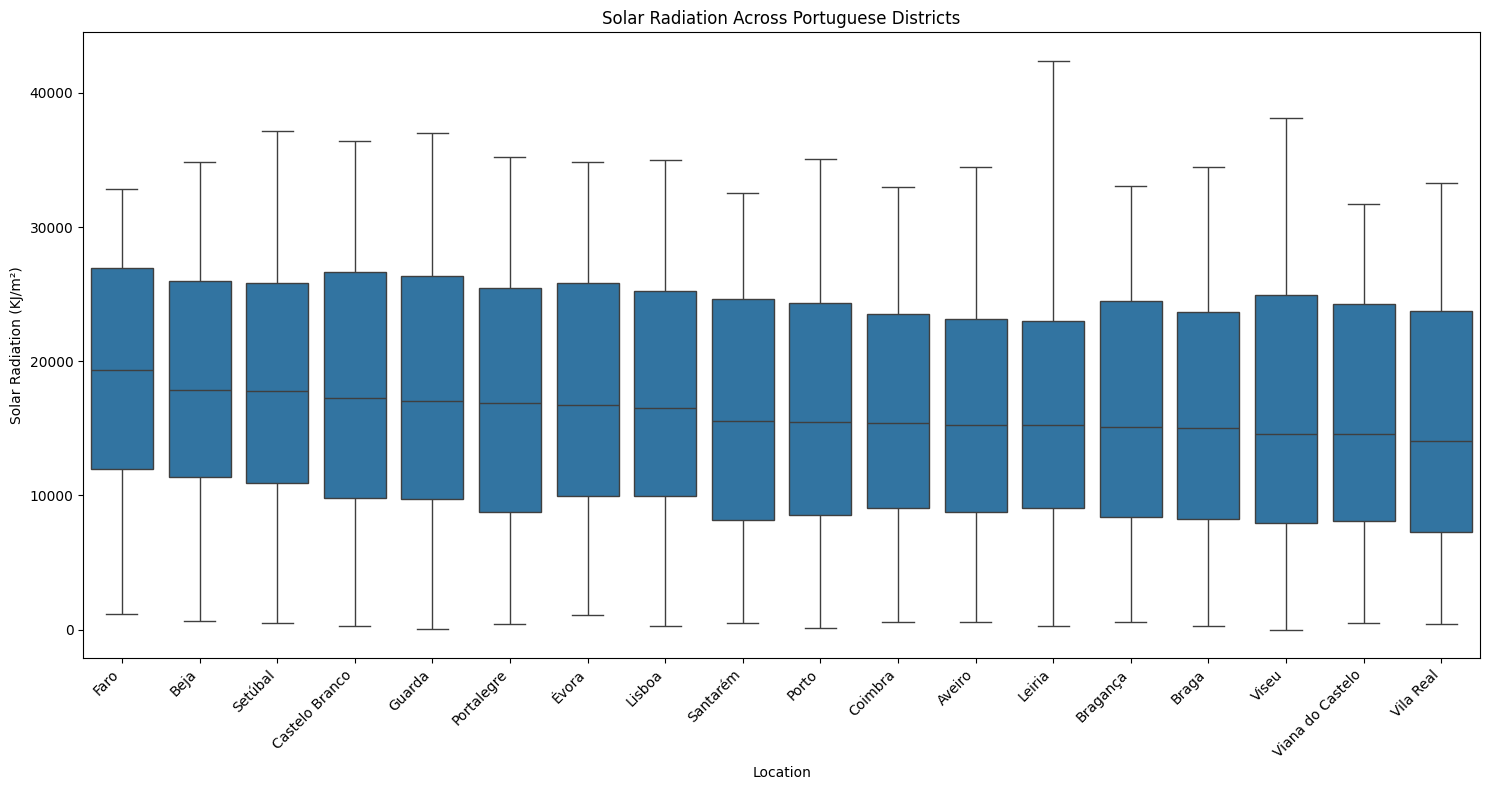

In [17]:
# Calculate the median value for each city
median_order = melted_df_cleaned.groupby('variable')['value'].median().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df_cleaned, x='variable', y='value', order=median_order)
plt.title('Solar Radiation Across Portuguese Districts')
plt.xlabel('Location')
plt.ylabel('Solar Radiation (kJ/m²)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [15]:
beja_df = melted_df[melted_df['variable'] == 'Beja']
beja_df['Month'] = beja_df['Date'].dt.month

/tmp/ipython-input-1925568088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beja_df['Month'] = beja_df['Date'].dt.month


/tmp/ipython-input-881356974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=beja_df, x='Month', y='value', palette="coolwarm")


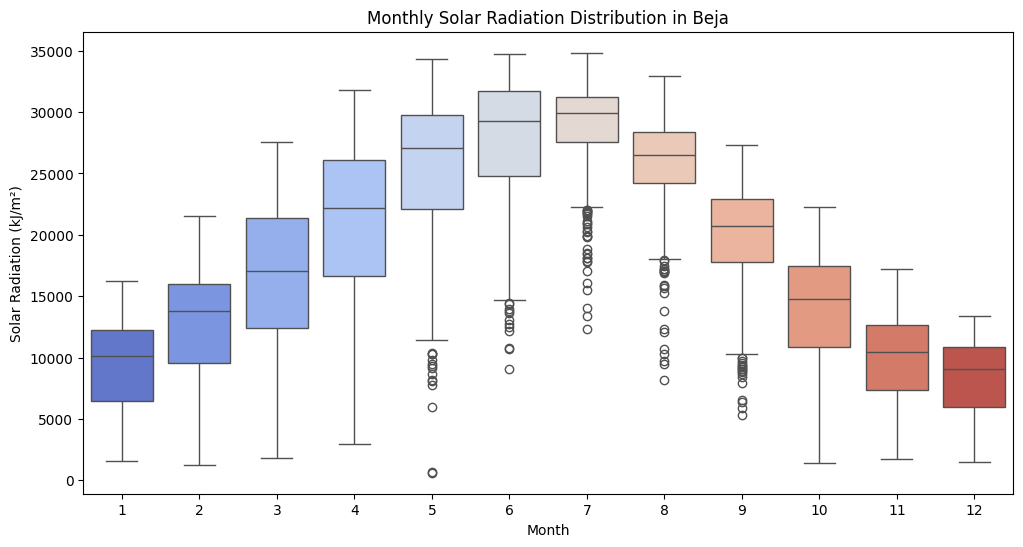

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=beja_df, x='Month', y='value', palette="coolwarm")
plt.title('Monthly Solar Radiation Distribution in Beja')
plt.xlabel('Month')
plt.ylabel('Solar Radiation (kJ/m²)')
plt.show()